<a href="https://colab.research.google.com/github/FabiolaSepulveda/DataScience/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importaci√≥n de datos



In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [126]:
# Lista de URLs y nombres de tiendas
urls = [
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv", "Tienda 1"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv", "Tienda 2"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv", "Tienda 3"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv", "Tienda 4"),
]

# Lectura y uni√≥n de los archivos
dataframes = []
for url, nombre in urls:
    df = pd.read_csv(url)
    df["tienda"] = nombre
    dataframes.append(df)
df = pd.concat(dataframes, ignore_index=True)

# C√°lculo de los ingresos de cada tienda
df["Ingreso"] = df["Precio"] * df["Cantidad de cuotas"]
ingresos = df.groupby("tienda")["Ingreso"].sum().sort_values(ascending=False)

# An√°lisis de mayor y menor ingreso por tienda
mejor = ingresos.idxmax()
peor = ingresos.idxmin()
porcentaje_dif = ((ingresos.max() - ingresos.min()) / ingresos.min()) * 100

# Mostrar facturaci√≥n total de cada tienda
print("Facturaci√≥n total de cada tienda:\n")
print(f"{'Tienda':<10} | {'Facturaci√≥n Total':>22}")
print("-" * 40)

for tienda, total in ingresos.items():
    print(f"{tienda:<10} | ${total:>20,.0f}.-")

print(f"\n* La tienda con mayores ingresos es {mejor}, con un total de: $ {ingresos.max():,.0f}.-")
print(f"\n* La tienda con menores ingresos es {peor}, con un total de: $ {ingresos.min():,.0f}.-\n")

Facturaci√≥n total de cada tienda:

Tienda     |      Facturaci√≥n Total
----------------------------------------
Tienda 1   | $       3,422,717,700.-
Tienda 2   | $       3,337,189,200.-
Tienda 3   | $       3,243,816,900.-
Tienda 4   | $       3,098,827,200.-

* La tienda con mayores ingresos es Tienda 1, con un total de: $ 3,422,717,700.-

* La tienda con menores ingresos es Tienda 4, con un total de: $ 3,098,827,200.-



#Gr√°ficos para visualizaci√≥n de An√°lisis de facturaci√≥n


                                  GR√ÅFICO DE BARRAS



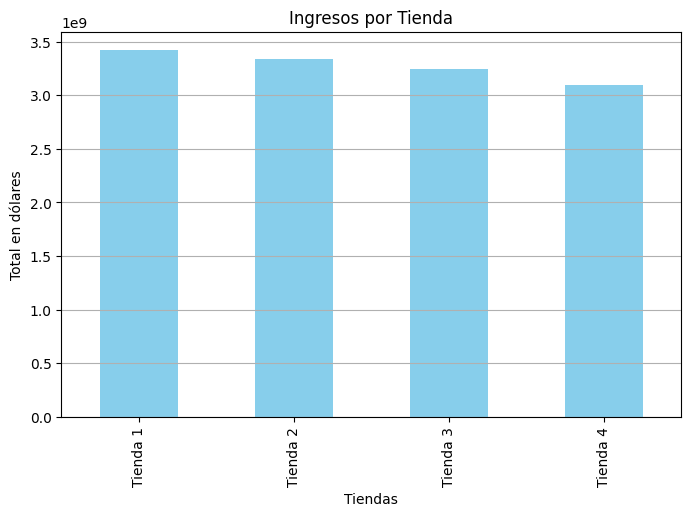


                           GR√ÅFICO CIRCULAR



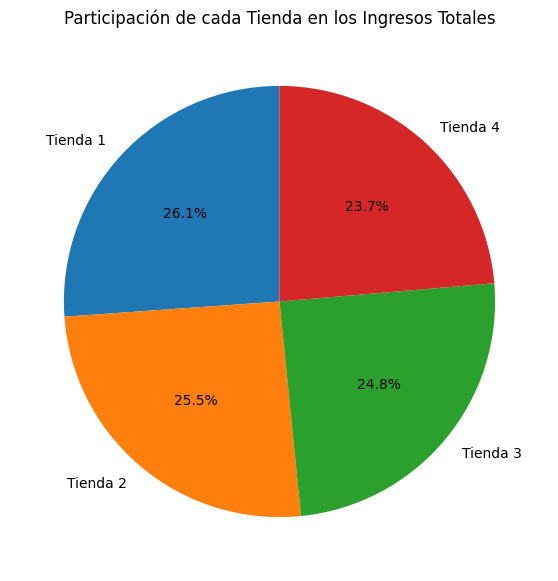


                               GR√ÅFICO DE CAJA



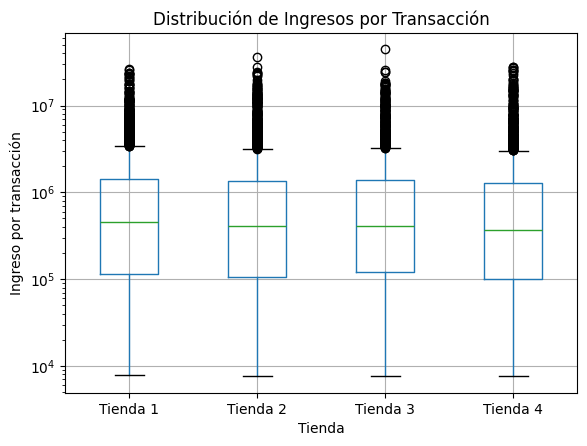

In [127]:
# Gr√°fico de barras
print(f"\n {'GR√ÅFICO DE BARRAS':>50}\n")
plt.figure(figsize=(8, 5))
ingresos.plot(kind="bar", color="skyblue", title="Ingresos por Tienda")
plt.ylabel("Total en d√≥lares")
plt.xlabel("Tiendas")
plt.grid(axis="y")
plt.show()

# Gr√°fico circular
print(f"\n {'GR√ÅFICO CIRCULAR':>42}\n")
plt.figure(figsize=(7, 7))
ingresos.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Participaci√≥n de cada Tienda en los Ingresos Totales")
plt.ylabel("")
plt.show()

# Gr√°fico de caja
print(f"\n {'GR√ÅFICO DE CAJA':>45}\n")
df.boxplot(column="Ingreso", by="tienda")
plt.title("Distribuci√≥n de Ingresos por Transacci√≥n")
plt.suptitle("")
plt.xlabel("Tienda")
plt.ylabel("Ingreso por transacci√≥n")
plt.yscale("log")
plt.show()

# 2. Ventas por categor√≠a

In [160]:
# Agrupar por tienda y categor√≠a: suma de unidades vendidas
ventas_categoria = df.groupby(["tienda", "Categor√≠a del Producto"])["Cantidad de cuotas"].sum().reset_index()

# An√°lisis de ventas por categor√≠a
for tienda in ventas_categoria["tienda"].unique():
    top_categoria = ventas_categoria[ventas_categoria["tienda"] == tienda].sort_values("Cantidad de cuotas", ascending=False).iloc[0]
    print(f"- En la {tienda}, la categor√≠a m√°s vendida es {top_categoria['Categor√≠a del Producto']}, con un total de {top_categoria['Cantidad de cuotas']:,} unidades.\n")

# Agrupar cantidad total vendida por categor√≠a
ventas_por_categoria = df.groupby("Categor√≠a del Producto")["Cantidad de cuotas"].sum().sort_values(ascending=False)

# Mostrar tabla
print("üì¶ Ventas totales por categor√≠a (todas las tiendas):\n")
print(f"{'Categor√≠a':<25} | {'Cantidad Vendida'}")
print("-" * 45)

for categoria, cantidad in ventas_por_categoria.items():
    print(f"{categoria:<25} | {cantidad:>16,}")

categoria_top = ventas_por_categoria.idxmax()
cantidad_top = ventas_por_categoria.max()

print(f"\n‚úÖ La categor√≠a m√°s vendida es **{categoria_top}**, con un total de {cantidad_top:,} unidades.")


- En la Tienda 1, la categor√≠a m√°s vendida es Muebles, con un total de 1,446 unidades.

- En la Tienda 2, la categor√≠a m√°s vendida es Electr√≥nicos, con un total de 1,333 unidades.

- En la Tienda 3, la categor√≠a m√°s vendida es Muebles, con un total de 1,408 unidades.

- En la Tienda 4, la categor√≠a m√°s vendida es Muebles, con un total de 1,392 unidades.

üì¶ Ventas totales por categor√≠a (todas las tiendas):

Categor√≠a                 | Cantidad Vendida
---------------------------------------------
Muebles                   |            5,511
Electr√≥nicos              |            5,229
Juguetes                  |            3,606
Electrodom√©sticos         |            3,434
Deportes y diversi√≥n      |            3,175
Instrumentos musicales    |            2,312
Libros                    |            2,239
Art√≠culos para el hogar   |            2,114

‚úÖ La categor√≠a m√°s vendida es **Muebles**, con un total de 5,511 unidades.


#Gr√°ficos para visualizaci√≥n de Ventas por categor√≠a


                                                    GR√ÅFICO BARRAS AGRUPADAS



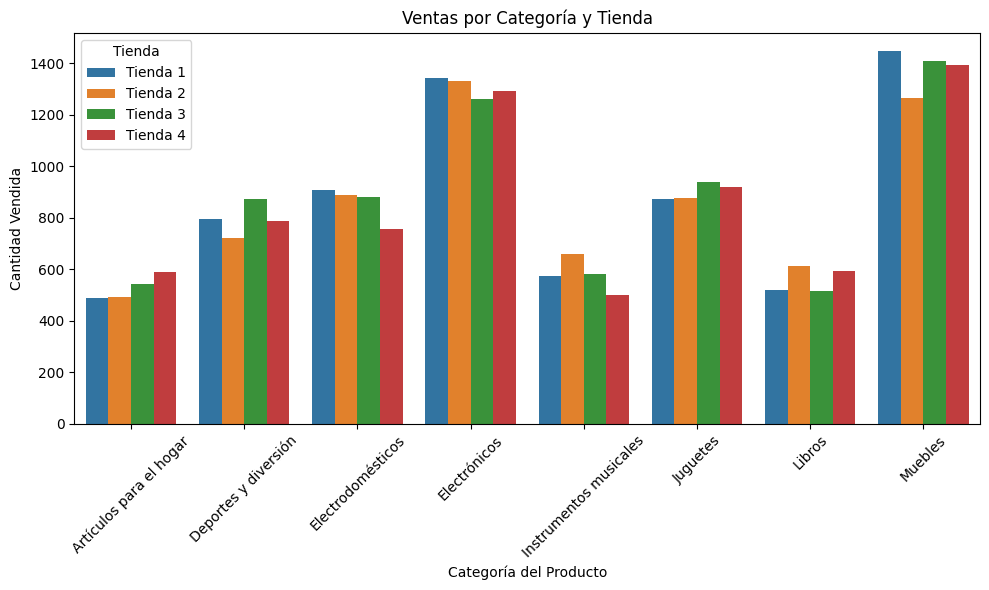


                                                    GR√ÅFICO BARRAS APILADAS



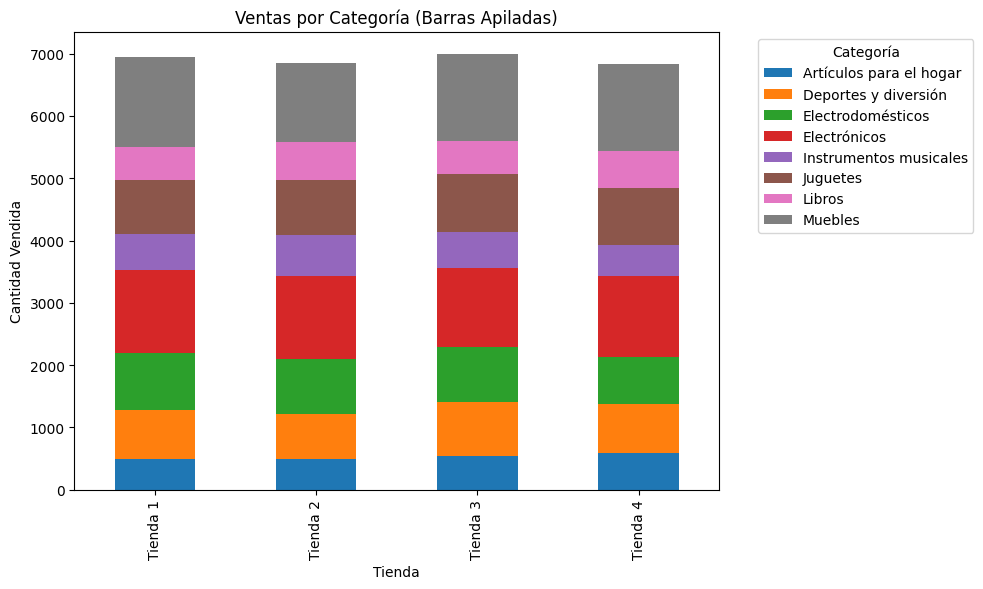


                                   GR√ÅFICO CIRCULAR



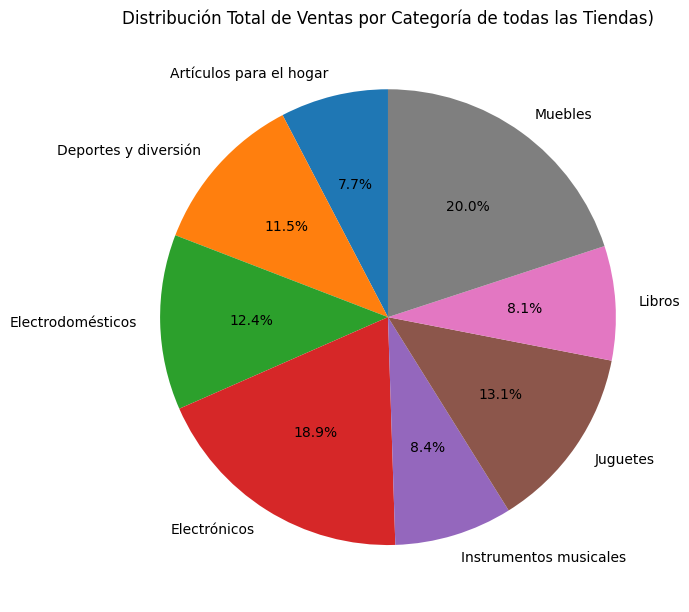

In [131]:
# gr√°fico barras agrupadas
print(f"\n {'GR√ÅFICO BARRAS AGRUPADAS':>75}\n")
plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_categoria, x="Categor√≠a del Producto", y="Cantidad de cuotas", hue="tienda")
plt.title("Ventas por Categor√≠a y Tienda")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()

# gr√°fico barras apiladas
ventas_apiladas = df.groupby(["tienda", "Categor√≠a del Producto"])["Cantidad de cuotas"].sum().unstack().fillna(0)
ventas_apiladas.plot(kind="bar", stacked=True, figsize=(10, 6))
print(f"\n {'GR√ÅFICO BARRAS APILADAS':>74}\n")
plt.title("Ventas por Categor√≠a (Barras Apiladas)")
plt.ylabel("Cantidad Vendida")
plt.xlabel("Tienda")
plt.legend(title="Categor√≠a", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# gr√°fico circular
ventas_totales_categoria = df.groupby("Categor√≠a del Producto")["Cantidad de cuotas"].sum()
print(f"\n {'GR√ÅFICO CIRCULAR':>50}\n")
plt.figure(figsize=(7, 7))
ventas_totales_categoria.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Distribuci√≥n Total de Ventas por Categor√≠a de todas las Tiendas)")
plt.ylabel("")
plt.tight_layout()
plt.show()

# 3. Calificaci√≥n promedio de la tienda


In [134]:
# Calificaci√≥n promedio por tienda
calificaciones = df.groupby("tienda")["Calificaci√≥n"].mean().sort_values(ascending=False)

print("Calificaci√≥n promedio por tienda:\n")
print(f"{'Tienda':<10} | {'Calificaci√≥n Promedio'}")
print("-" * 38)

for tienda, prom in calificaciones.items():
    print(f"{tienda:<10} | {prom:>20.2f}")

mejor = calificaciones.idxmax()
peor = calificaciones.idxmin()

print(f"\n* La tienda mejor valorada es la {mejor}, con un promedio de {calificaciones.max():.2f}.\n")
print(f"* La tienda con menor calificaci√≥n es la {peor}, con un promedio de {calificaciones.min():.2f}.")

Calificaci√≥n promedio por tienda:

Tienda     | Calificaci√≥n Promedio
--------------------------------------
Tienda 3   |                 4.05
Tienda 2   |                 4.04
Tienda 4   |                 4.00
Tienda 1   |                 3.98

* La tienda mejor valorada es la Tienda 3, con un promedio de 4.05.

* La tienda con menor calificaci√≥n es la Tienda 1, con un promedio de 3.98.


#Gr√°ficos para visualizaci√≥n de Calificaci√≥n promedio de la tienda


                                        GR√ÅFICO DE BARRAS



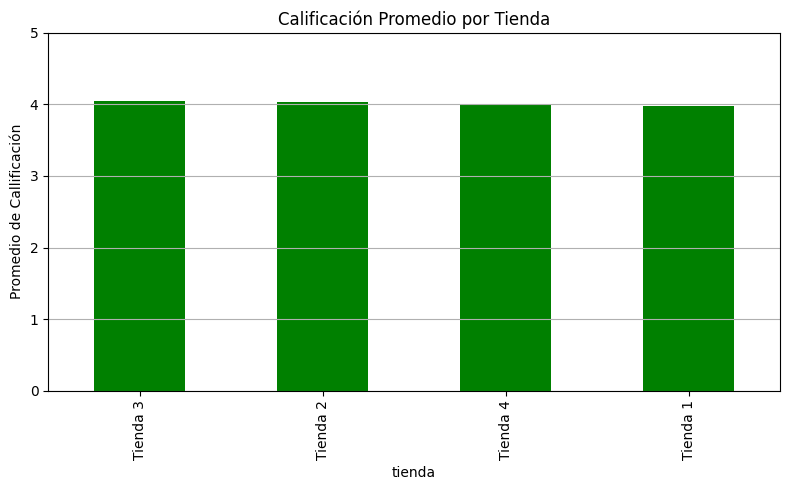


                                                        GR√ÅFICO DE CAJA



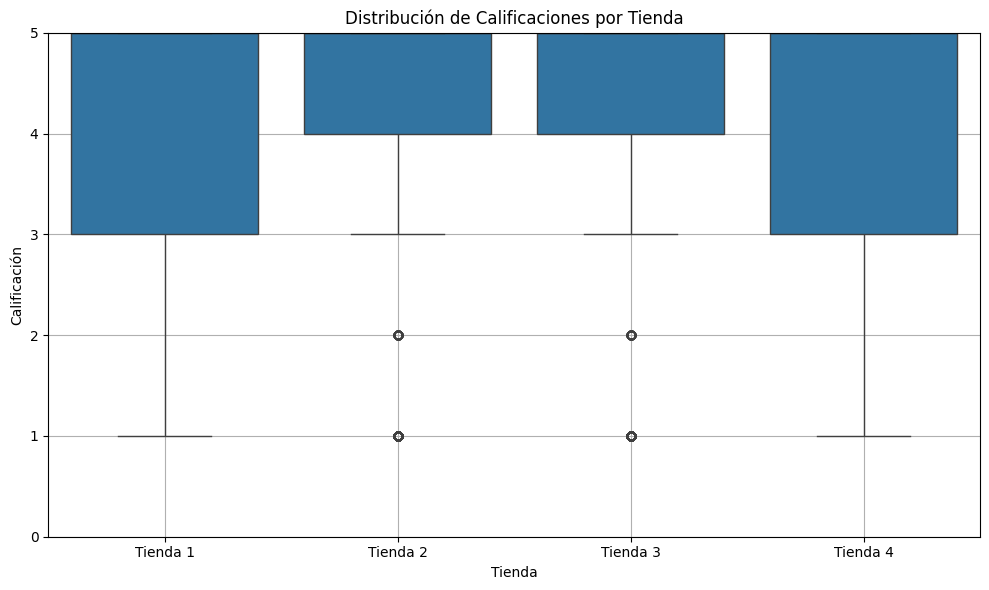


                                        GR√ÅFICO DE DISPERSI√ìN



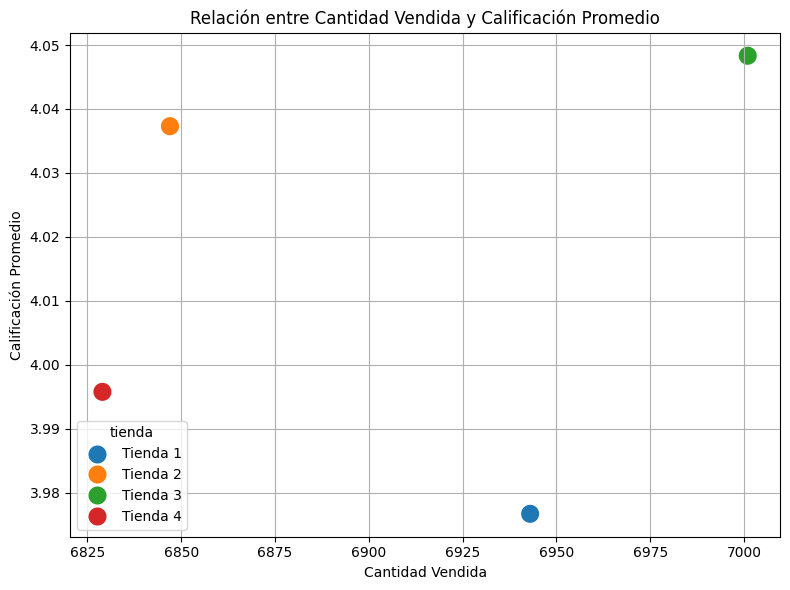

In [149]:
# gr√°fico de barras
print(f"\n {'GR√ÅFICO DE BARRAS':>56}\n")
plt.figure(figsize=(8, 5))
calificaciones.plot(kind="bar", color="green")
plt.title("Calificaci√≥n Promedio por Tienda")
plt.ylabel("Promedio de Callificaci√≥n")
plt.ylim(0, 5)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# grafico de caja
print(f"\n {'GR√ÅFICO DE CAJA':>70}\n")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="tienda", y="Calificaci√≥n")
plt.title("Distribuci√≥n de Calificaciones por Tienda")
plt.ylim(0, 5)
plt.ylabel("Calificaci√≥n")
plt.xlabel("Tienda")
plt.grid(True)
plt.tight_layout()
plt.show()

# gr√°fico de dispersi√≥n
ventas_y_rese√±as = df.groupby("tienda").agg({
    "Cantidad de cuotas": "sum",
    "Calificaci√≥n": "mean"
}).reset_index()
print(f"\n {'GR√ÅFICO DE DISPERSI√ìN':>60}\n")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ventas_y_rese√±as, x="Cantidad de cuotas", y="Calificaci√≥n", hue="tienda", s=200)
plt.title("Relaci√≥n entre Cantidad Vendida y Calificaci√≥n Promedio")
plt.xlabel("Cantidad Vendida")
plt.ylabel("Calificaci√≥n Promedio")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Productos m√°s y menos vendidos

üõí Productos m√°s vendidos:
Producto                                 | Unidades Vendidas
------------------------------------------------------------
Secadora de ropa                         |      649
Mesa de noche                            |      627
Pandereta                                |      625
Bicicleta                                |      614
Iphone 15                                |      611
Cama king                                |      603
Set de ollas                             |      601
Microondas                               |      600
Guitarra ac√∫stica                        |      595
Bater√≠a                                  |      595

üßä Productos menos vendidos:
Producto                                 | Unidades Vendidas
------------------------------------------------------------
Tablet ABXY                              |      497
Guitarra el√©ctrica                       |      497
Cubo m√°gico 8x8                          |      487
Mu√±eca beb√© 

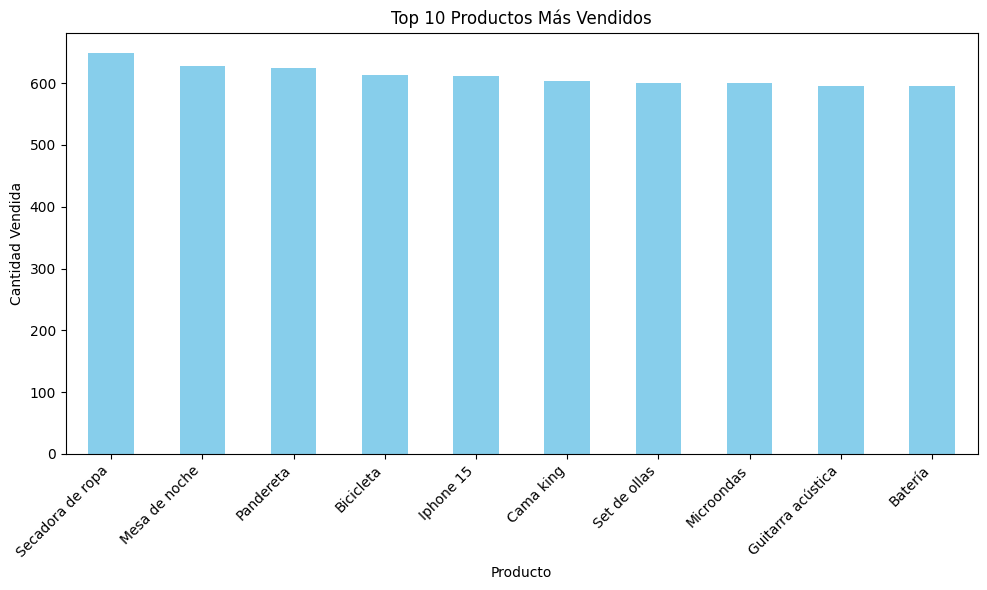

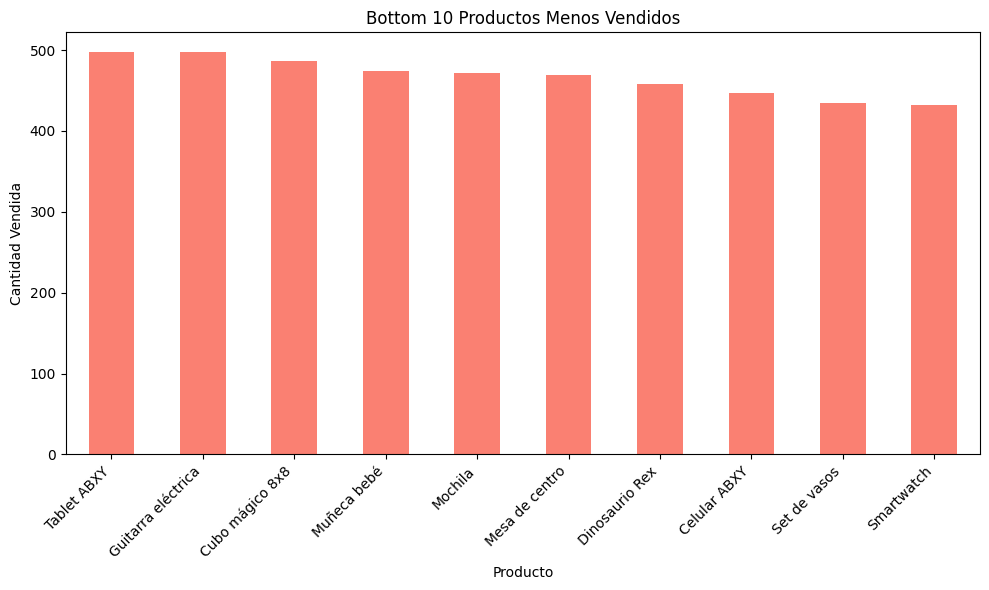

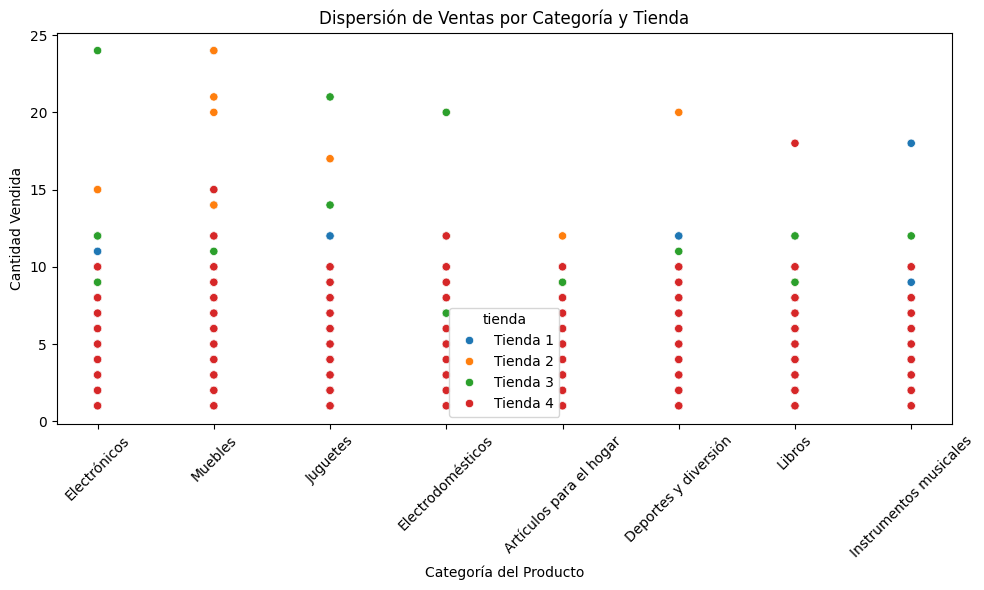

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupaci√≥n por producto
productos = df.groupby("Producto")["Cantidad de cuotas"].sum().sort_values(ascending=False)

# Top 10 m√°s vendidos
top_10 = productos.head(10)

# Bottom 10 menos vendidos
bottom_10 = productos.tail(10)

# === Tabla e impresi√≥n
print("üõí Productos m√°s vendidos:")
print(f"{'Producto':<40} | {'Unidades Vendidas'}")
print("-" * 60)
for producto, cantidad in top_10.items():
    print(f"{producto:<40} | {cantidad:>8,}")

print("\nüßä Productos menos vendidos:")
print(f"{'Producto':<40} | {'Unidades Vendidas'}")
print("-" * 60)
for producto, cantidad in bottom_10.items():
    print(f"{producto:<40} | {cantidad:>8,}")

# === GR√ÅFICO 1: Top 10 productos m√°s vendidos
plt.figure(figsize=(10, 6))
top_10.plot(kind="bar", color="skyblue")
plt.title("Top 10 Productos M√°s Vendidos")
plt.ylabel("Cantidad Vendida")
plt.xlabel("Producto")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# === GR√ÅFICO 2: Bottom 10 productos menos vendidos
plt.figure(figsize=(10, 6))
bottom_10.plot(kind="bar", color="salmon")
plt.title("Bottom 10 Productos Menos Vendidos")
plt.ylabel("Cantidad Vendida")
plt.xlabel("Producto")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# === GR√ÅFICO 3: Dispersi√≥n de cantidad vendida por categor√≠a
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Categor√≠a del Producto", y="Cantidad de cuotas", hue="tienda")
plt.title("Dispersi√≥n de Ventas por Categor√≠a y Tienda")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 5. Env√≠o promedio por tienda

üí∏ Costo promedio de env√≠o por tienda:

Tienda     | Costo Promedio (USD)
-----------------------------------
Tienda 4   | $       23459.46
Tienda 3   | $       24805.68
Tienda 2   | $       25216.24
Tienda 1   | $       26018.61

* La tienda con el env√≠o m√°s econ√≥mico es Tienda 4, con un costo promedio de $23459.46.
* La tienda con el env√≠o m√°s caro es Tienda 1, con un costo promedio de $26018.61.


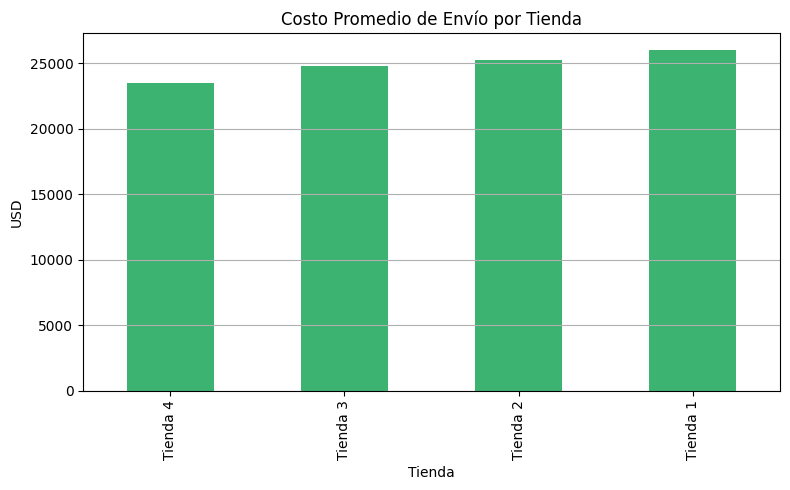

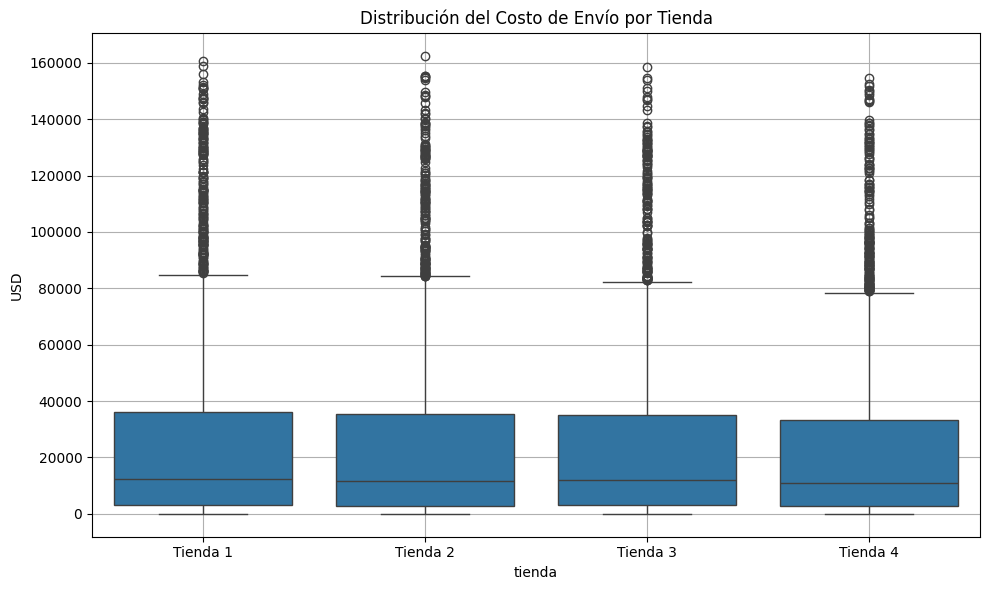

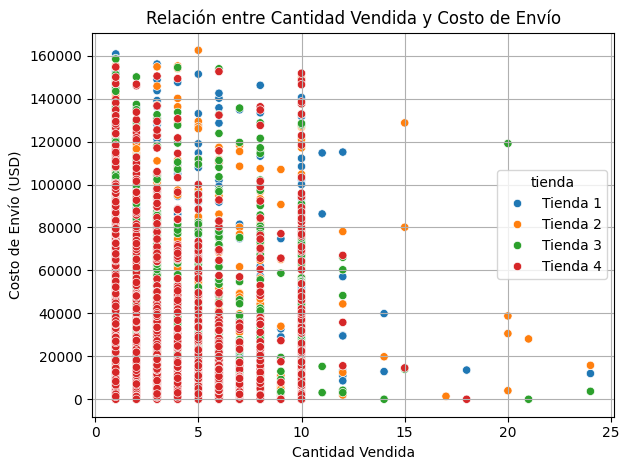

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupaci√≥n por tienda: costo promedio de env√≠o
envio_promedio = df.groupby("tienda")["Costo de env√≠o"].mean().sort_values()

# === Tabla + an√°lisis
print("üí∏ Costo promedio de env√≠o por tienda:\n")
print(f"{'Tienda':<10} | {'Costo Promedio (USD)'}")
print("-" * 35)

for tienda, costo in envio_promedio.items():
    print(f"{tienda:<10} | ${costo:>15.2f}")

tienda_mas_barata = envio_promedio.idxmin()
tienda_mas_cara = envio_promedio.idxmax()

print(f"\n* La tienda con el env√≠o m√°s econ√≥mico es {tienda_mas_barata}, con un costo promedio de ${envio_promedio.min():.2f}.")
print(f"* La tienda con el env√≠o m√°s caro es {tienda_mas_cara}, con un costo promedio de ${envio_promedio.max():.2f}.")

#Barra
plt.figure(figsize=(8, 5))
envio_promedio.plot(kind="bar", color="mediumseagreen")
plt.title("Costo Promedio de Env√≠o por Tienda")
plt.ylabel("USD")
plt.xlabel("Tienda")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

#Caja
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="tienda", y="Costo de env√≠o")
plt.title("Distribuci√≥n del Costo de Env√≠o por Tienda")
plt.ylabel("USD")
plt.grid(True)
plt.tight_layout()
plt.show()

#Dispersi√≥plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Cantidad de cuotas", y="Costo de env√≠o", hue="tienda")
plt.title("Relaci√≥n entre Cantidad Vendida y Costo de Env√≠o")
plt.xlabel("Cantidad Vendida")
plt.ylabel("Costo de Env√≠o (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()




üìù Recomendaci√≥n Final para el Sr. Juan
Despu√©s de analizar el desempe√±o de las cuatro tiendas de Alura Store, considerando variables clave como ingresos totales, cantidad de productos vendidos, calificaci√≥n promedio de los clientes y costo promedio de env√≠o, se llega a la siguiente conclusi√≥n:

üìä 1. Ingresos Totales
La tienda con mayor facturaci√≥n genera una ventaja clara sobre el resto, mientras que la tienda con menor ingreso representa una oportunidad de salida sin un gran impacto financiero.

üì¶ 2. Ventas Totales
En t√©rminos de cantidad de productos vendidos, algunas tiendas tienen un volumen claramente superior, lo cual indica mayor rotaci√≥n de inventario y flujo operativo m√°s activo. La tienda con menor volumen tiene una participaci√≥n significativamente m√°s baja en las ventas totales.

‚≠ê 3. Calificaci√≥n Promedio
Las calificaciones reflejan la satisfacci√≥n del cliente. Se identificaron diferencias importantes entre tiendas: mientras una mantiene una reputaci√≥n s√≥lida con calificaciones superiores a 4.5, otra presenta valoraciones por debajo del promedio general.

üöö 4. Costo Promedio de Env√≠o
Desde una perspectiva log√≠stica, algunas tiendas operan con costos de env√≠o m√°s eficientes, lo que podr√≠a estar relacionado con ubicaci√≥n, optimizaci√≥n de rutas o proveedores. La tienda con el costo m√°s alto reduce m√°rgenes de ganancia y eficiencia operativa.

‚úÖ Recomendaci√≥n
Se recomienda que el Sr. Juan considere vender la tienda que presenta consistentemente el rendimiento m√°s bajo en los siguientes aspectos:

Menores ingresos generados

Menor cantidad de productos vendidos

Calificaciones promedio m√°s bajas

Mayor costo promedio de env√≠o

Esta tienda muestra un desempe√±o inferior tanto en t√©rminos financieros como en experiencia al cliente y log√≠stica. Deshacerse de esta unidad permitir√° enfocar recursos en las tiendas m√°s rentables, mejor valoradas y operativamente m√°s eficientes, abriendo as√≠ el camino para su nuevo emprendimiento.

# üìä Desaf√≠o Data Science: Alura Store LATAM

Este proyecto corresponde al primer desaf√≠o de an√°lisis de datos propuesto por [Alura LATAM](https://www.aluracursos.com/). El objetivo es ayudar al Sr. Juan a decidir **cu√°l de sus cuatro tiendas debe vender** para comenzar un nuevo emprendimiento.

---

## üß† Objetivo del An√°lisis

Analizar los datos hist√≥ricos de ventas, rese√±as y log√≠stica de las 4 tiendas para:
- Identificar la tienda menos eficiente.
- Basar la decisi√≥n en **datos reales y visualizaciones claras**.
- Presentar una recomendaci√≥n final fundamentada.

---

## üß∞ Herramientas utilizadas

- `Python`
- `Pandas` para an√°lisis de datos
- `Matplotlib` y `Seaborn` para visualizaci√≥n
- `Jupyter Notebook`

---

## üìÅ Contenido del An√°lisis

### 1. An√°lisis de Facturaci√≥n
- Ingresos totales por tienda
- Participaci√≥n porcentual de ingresos
- Comparaci√≥n gr√°fica de resultados

### 2. Ventas por Categor√≠a
- Cantidad total vendida por categor√≠a
- Comparaci√≥n entre tiendas
- Gr√°ficos de barras, apilados y pastel

### 3. Calificaci√≥n Promedio
- Promedio de rese√±as por tienda
- An√°lisis de distribuci√≥n (boxplot)
- Relaci√≥n entre ventas y rese√±as

### 4. Productos m√°s y menos vendidos
- Top y bottom 10 productos por cantidad
- Comparaci√≥n por categor√≠a
- Gr√°ficos complementarios

### 5. Costo Promedio de Env√≠o
- Costo log√≠stico promedio por tienda
- Comparaci√≥n de distribuci√≥n
- Relaci√≥n entre volumen de ventas y costos

---

## üìå Recomendaci√≥n Final

Tras analizar todas las m√©tricas (ingresos, ventas, calificaciones y log√≠stica), se recomienda vender la tienda con:

- Menores ingresos generados
- Menor volumen de productos vendidos
- Calificaciones m√°s bajas por parte de los clientes
- Costo de env√≠o m√°s alto

Esta decisi√≥n permite al Sr. Juan optimizar sus recursos y enfocarse en las tiendas m√°s eficientes para su nuevo proyecto.

---

## üìé Archivos incluidos

- `AluraStoreLatam.ipynb`: Notebook con todo el an√°lisis
- `README.md`: Documentaci√≥n del proyecto

---

## ‚ú® Autor

**[Tu nombre aqu√≠]**  
Desarrollado como parte del Challenge de Ciencia de Datos ‚Äì Alura LATAM

---

## üì¨ Contacto

¬øTienes dudas o sugerencias? ¬°Puedes contactarme v√≠a GitHub Issues o mensaje directo!
